In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
homes = pd.read_csv('/Users/stellasotos/Desktop/kc_house_data.csv')

In [277]:
homes = homes.drop('id', 1)
homes = homes.drop('date', 1)
homes = homes.drop('waterfront', 1)
homes = homes.drop('view', 1)
homes = homes.drop('condition', 1)
homes = homes.drop('grade', 1)
homes = homes.drop('zipcode', 1)
homes = homes.drop('yr_renovated', 1)
homes = homes.drop('lat', 1)
homes = homes.drop('long', 1)
homes.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,1800,7503


In [280]:
np.seterr(invalid='ignore')
homes.dropna(axis=1, how='all')
homes.info

<bound method DataFrame.info of            price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       221900.0         3       1.00         1180      5650     1.0   
1       538000.0         3       2.25         2570      7242     2.0   
2       180000.0         2       1.00          770     10000     1.0   
3       604000.0         4       3.00         1960      5000     1.0   
4       510000.0         3       2.00         1680      8080     1.0   
5      1225000.0         4       4.50         5420    101930     1.0   
6       257500.0         3       2.25         1715      6819     2.0   
7       291850.0         3       1.50         1060      9711     1.0   
8       229500.0         3       1.00         1780      7470     1.0   
9       323000.0         3       2.50         1890      6560     2.0   
10      662500.0         3       2.50         3560      9796     1.0   
11      468000.0         2       1.00         1160      6000     1.0   
12      310000.0         3      

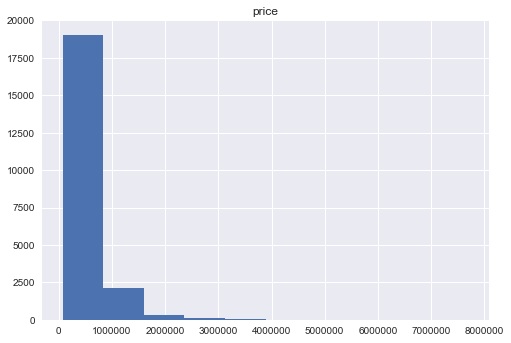

In [281]:
plt.hist(homes['price'], range = [min(homes['price']), max(homes['price'])])
plt.title('price')
plt.show()

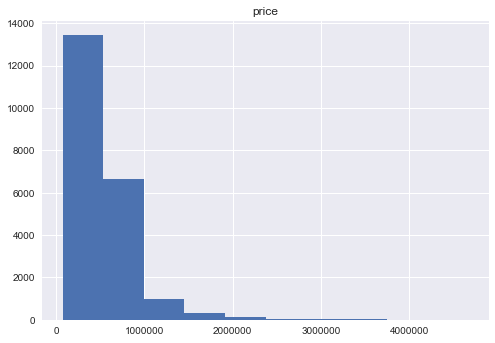

In [282]:
homes['price'] = pd.to_numeric(homes['price'])
homes['price'] = np.where(homes['price'] > 5000000, np.nan, homes['price'])
homes['price'] = homes['price'][~np.isnan(homes['price'])]

plt.hist(homes['price'], range = [min(homes['price']), max(homes['price'])])
plt.title('price')
plt.show()

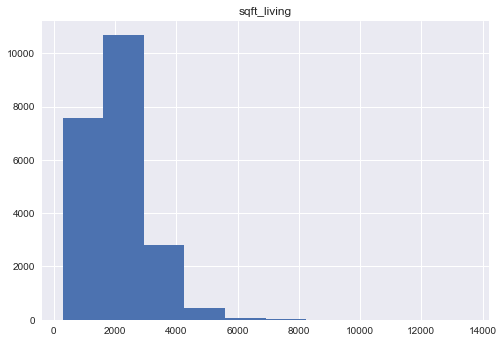

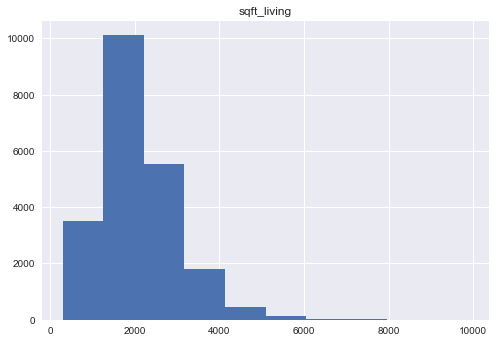

In [283]:
plt.hist(homes['sqft_living'], range = [min(homes['sqft_living']), max(homes['sqft_living'])])
plt.title('sqft_living')
plt.show()

homes['sqft_living'] = np.where(homes['sqft_living'] > 10000, np.nan, homes['sqft_living'])

plt.hist(homes['sqft_living'], range = [min(homes['sqft_living']), max(homes['sqft_living'])])
plt.title('sqft_living')
plt.show()

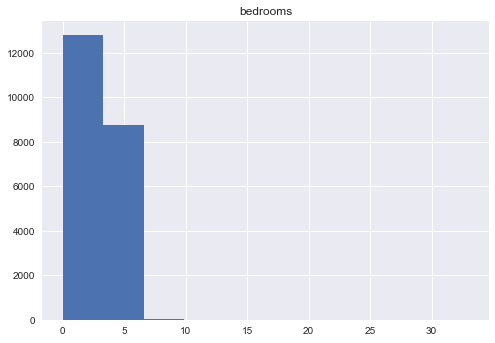

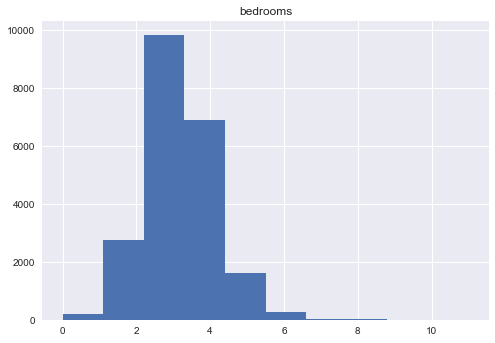

In [284]:
plt.hist(homes['bedrooms'], range = [min(homes['bedrooms']), max(homes['bedrooms'])])
plt.title('bedrooms')
plt.show()

homes['bedrooms'] = np.where(homes['bedrooms'] > 15, np.nan, homes['bedrooms'])

plt.hist(homes['bedrooms'], range = [min(homes['bedrooms']), max(homes['bedrooms'])])
plt.title('bedrooms')
plt.show()

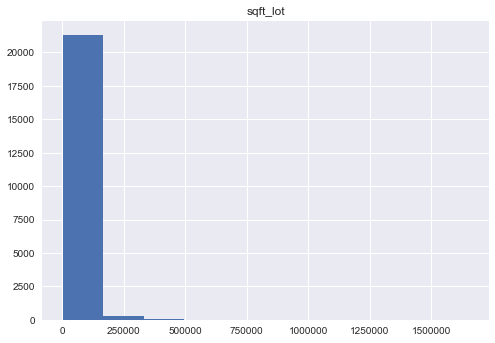

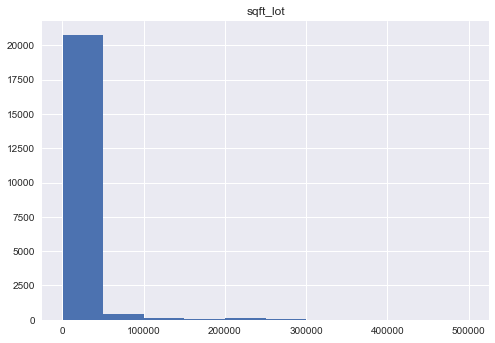

In [285]:
plt.hist(homes['sqft_lot'], range = [min(homes['sqft_lot']), max(homes['sqft_lot'])])
plt.title('sqft_lot')
plt.show()

homes['sqft_lot'] = np.where(homes['sqft_lot'] > 500000, np.nan, homes['sqft_lot'])

plt.hist(homes['sqft_lot'], range = [min(homes['sqft_lot']), max(homes['sqft_lot'])])
plt.title('sqft_lot')
plt.show()

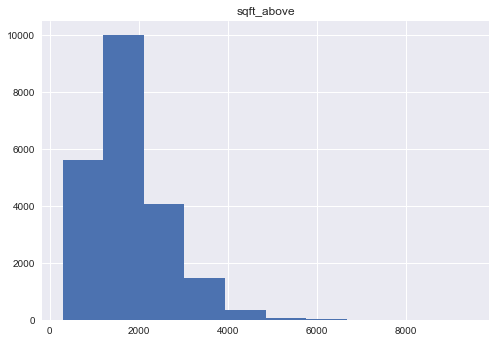

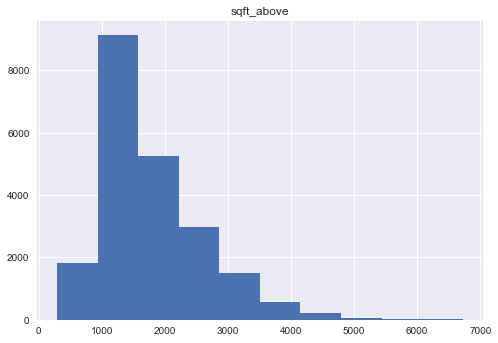

In [286]:
plt.hist(homes['sqft_above'], range = [min(homes['sqft_above']), max(homes['sqft_above'])])
plt.title('sqft_above')
plt.show()

homes['sqft_above'] = np.where(homes['sqft_above'] > 7000, np.nan, homes['sqft_above'])

plt.hist(homes['sqft_above'], range = [min(homes['sqft_above']), max(homes['sqft_above'])])
plt.title('sqft_above')
plt.show()

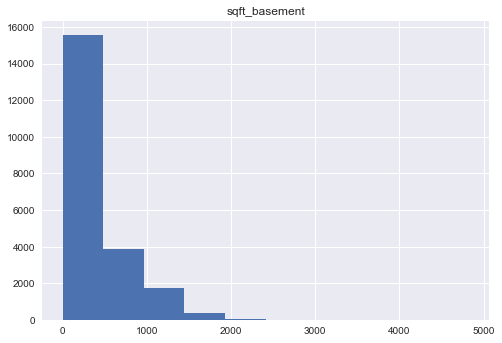

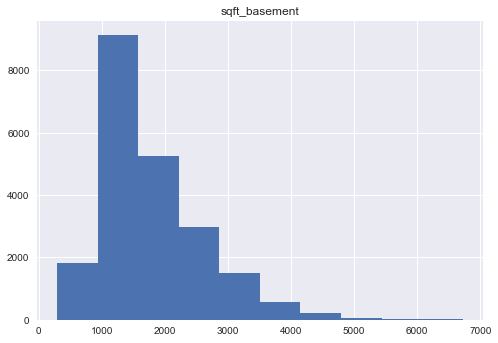

In [287]:
plt.hist(homes['sqft_basement'], range = [min(homes['sqft_basement']), max(homes['sqft_basement'])])
plt.title('sqft_basement')
plt.show()

homes['sqft_basement'] = np.where(homes['sqft_basement'] > 3000, np.nan, homes['sqft_above'])

plt.hist(homes['sqft_basement'], range = [min(homes['sqft_basement']), max(homes['sqft_basement'])])
plt.title('sqft_basement')
plt.show()

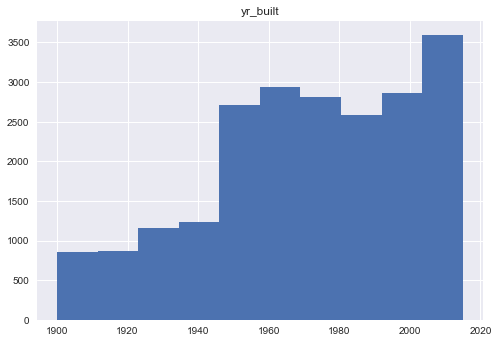

In [288]:
plt.hist(homes['yr_built'], range = [min(homes['yr_built']), max(homes['yr_built'])])
plt.title('yr_built')
plt.show()

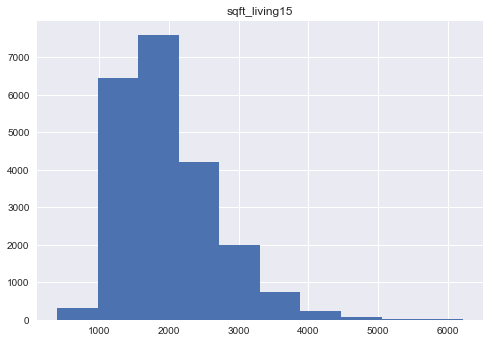

In [289]:
plt.hist(homes['sqft_living15'], range = [min(homes['sqft_living15']), max(homes['sqft_living15'])])
plt.title('sqft_living15')
plt.show()

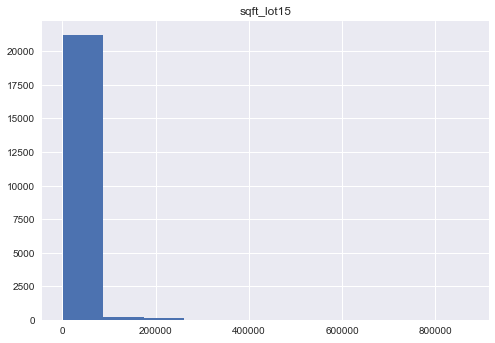

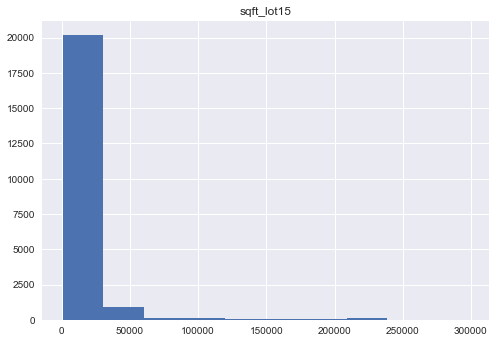

In [290]:
plt.hist(homes['sqft_lot15'], range = [min(homes['sqft_lot15']), max(homes['sqft_lot15'])])
plt.title('sqft_lot15')
plt.show()

homes['sqft_lot15'] = np.where(homes['sqft_lot15'] > 300000, np.nan, homes['sqft_lot15'])

plt.hist(homes['sqft_lot15'], range = [min(homes['sqft_lot15']), max(homes['sqft_lot15'])])
plt.title('sqft_lot15')
plt.show()

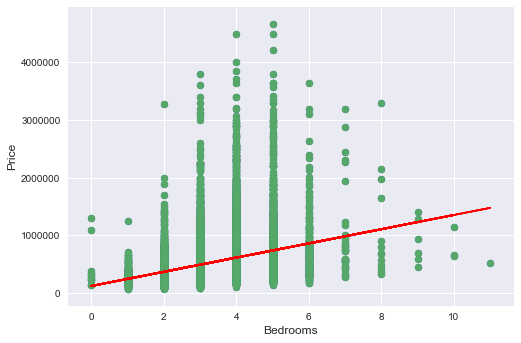

In [293]:
y = pd.to_numeric(homes.iloc[:,0])
x = pd.to_numeric(homes.iloc[:,1])
idx = np.isfinite(x) & np.isfinite(y)

plt.ylabel("Price", fontsize=12)
plt.xlabel("Bedrooms", fontsize=12)
plt.scatter(x, y)
params = np.polyfit(x[idx], y[idx], 1)
slope = params[0]
y_intercept = params[1]

# best fit line
y_hat = y_intercept+slope*x

plt.plot(x, y_hat, color="red")

print()
plt.show()

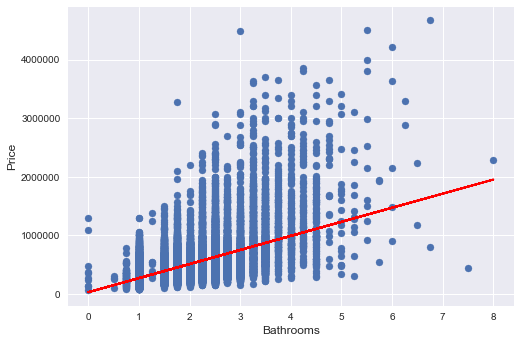

In [294]:
y = pd.to_numeric(homes.iloc[:,0])
x = pd.to_numeric(homes.iloc[:,2])
idx = np.isfinite(x) & np.isfinite(y)


plt.ylabel("Price", fontsize=12)
plt.xlabel("Bathrooms", fontsize=12)
plt.scatter(x, y)
params = np.polyfit(x[idx], y[idx], 1)
slope = params[0]
y_intercept = params[1]

# best fit line
y_hat = y_intercept+slope*x

plt.plot(x, y_hat, color="red")

print()
plt.show()

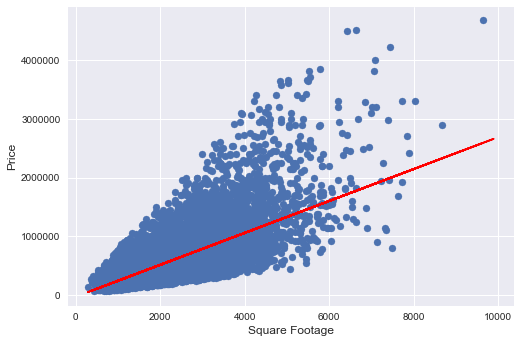

In [295]:
y = pd.to_numeric(homes.iloc[:,0])
x = pd.to_numeric(homes.iloc[:,3])
idx = np.isfinite(x) & np.isfinite(y)

plt.ylabel("Price", fontsize=12)
plt.xlabel("Square Footage", fontsize=12)
plt.scatter(x, y)
params = np.polyfit(x[idx], y[idx], 1)
slope = params[0]
y_intercept = params[1]

# best fit line
y_hat = y_intercept+slope*x

plt.plot(x, y_hat, color="red")
print()
plt.show()

In [256]:
homes.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

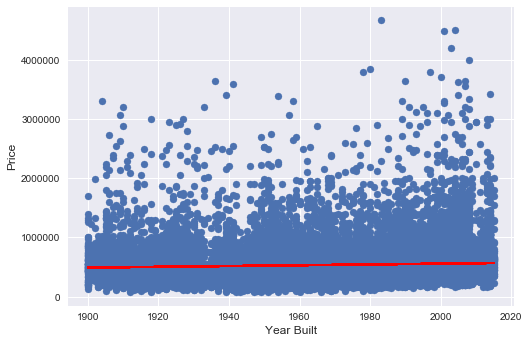

In [296]:
y = pd.to_numeric(homes.iloc[:,0])
x = pd.to_numeric(homes.iloc[:,8])
idx = np.isfinite(x) & np.isfinite(y)

plt.ylabel("Price", fontsize=12)
plt.xlabel("Year Built", fontsize=12)
plt.scatter(x, y)
params = np.polyfit(x[idx],y[idx],1)
slope = params[0]
y_intercept = params[1]

# best fit line
y_hat = y_intercept+slope*x

plt.plot(x, y_hat, color="red")
print()
plt.show()

In [297]:
from sklearn.linear_model import LinearRegression # sklearn Linear Regression regressor
from sklearn.model_selection import train_test_split # Sklearn train_test_split

# Partition 80% of the data for training and 20% for testing
train, test = train_test_split(homes, test_size = 0.2)


# training predictors
x_train = train.drop(['price'], 1)
# training y-values
y_train = train['price']

# testing predictors
x_test = train.drop(['price'], 1)
# testing y-values
y_test = train['price']


idx = np.isfinite(x_train) & np.isfinite(y_train) & np.isfinite(x_test) & np.isfinite(y_test)

# Set our regression model to Linear Regression()
regr = LinearRegression()

# Train our model ('fit' synonomous to 'train)
regr.fit(x_train[idx], y_train[idx])

# Let's get our predictions of the y-test values
predictions = pd.Series(regr.predict(x_test[idx]))


# set the indexes of the predictions and actual values to the same thing so that we can perform arithmetic
predictions.index = range(len(predictions))
y_test.index = range(len(y_test[idx]))

# Find the differences between the actual and predicted values
differences = abs(predictions - y_test[idx])

# calculating the percent error
errors = differences/y_test[idx] * 100
mean_error = np.mean(errors)

# Getting an r^2 value
from sklearn.metrics import r2_score
r2 = r2_score(y_true = y_test[idx], y_pred = predictions)

print('Average difference: ', np.mean(differences))
print('\nAverage Percent Error:', mean_error)
print('\nIntercept:', regr.intercept_)
print('\nRegression Coefficients:', regr.coef_)
print('\nr^2:', r2)

/Users/stellasotos/anaconda/lib/python3.6/site-packages/pandas/core/indexes/base.py:2984: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


ValueError: operands could not be broadcast together with shapes (172900,) (10,) 